# **CHARGEMENT DES LIBRAIRIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# chargement des données





In [ ]:
x_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("Y_train.csv")
X_test = pd.read_csv("X_test.csv")

<ipython-input-2-e4e2dc291601>:1: DtypeWarning: Columns (21,22,23,24,69,70,71,72,93,94,95,96,97,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  x_train = pd.read_csv("X_train.csv")
<ipython-input-2-e4e2dc291601>:3: DtypeWarning: Columns (20,21,22,23,24,68,69,70,71,72,92,93,94,95,96,97,106,107,108,109,110,111,112,113,114,115,116,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  X_test = pd.read_csv("X_test.csv")


# preprocessing



# 1. traitement des valeurs manquantes :




Pour chaque observation de la base, il y a 147 colonnes dont 144 peuvent être regroupées en 6 catégories :

item,

cash_price,

make,

model,

goods_code,

Nbr_of_prod_purchas.

In [ ]:
x_train.isnull().sum()

ID                           0
item1                        0
item2                    45737
item3                    75909
item4                    83837
                         ...  
Nbr_of_prod_purchas21    88092
Nbr_of_prod_purchas22    88106
Nbr_of_prod_purchas23    88118
Nbr_of_prod_purchas24    88124
Nb_of_items                  1
Length: 146, dtype: int64

In [ ]:
missing_values_item = x_train.iloc[:, 1:25].isnull().sum()
missing_values_cash_price = x_train.iloc[:, 25:49].isnull().sum()
missing_values_make = x_train.iloc[:, 49:73].isnull().sum()
missing_values_model = x_train.iloc[:, 73:97].isnull().sum()
missing_values_good_code = x_train.iloc[:, 97:121].isnull().sum()
missing_values_Nbr_of_prod_purchas = x_train.iloc[:, 121:145].isnull().sum()


In [ ]:
missing_values_item = X_test.iloc[:, 1:25].isnull().sum()
missing_values_cash_price = X_test.iloc[:, 25:49].isnull().sum()
missing_values_make = X_test.iloc[:, 49:73].isnull().sum()
missing_values_model = X_test.iloc[:, 73:97].isnull().sum()
missing_values_good_code = X_test.iloc[:, 97:121].isnull().sum()
missing_values_Nbr_of_prod_purchas = X_test.iloc[:, 121:145].isnull().sum()


Le panier se décompose au maximum en 24 items. Par exemple, si un panier contient 3 items alors toutes les informations relatives à ces 3 items seront renseignées dans les colonnes item1, item2, item3, cash_price1, cash_price_2, cash_price3, make1, make2, make3, model1, model2, model3, goods_code1, goods_code2, goods_code3, Nbr_of_prod_purchas1, Nbr_of_prod_purchas2 et Nbr_of_prod_purchas3. Les variables restantes (celles avec un indice > 3) seront vides .

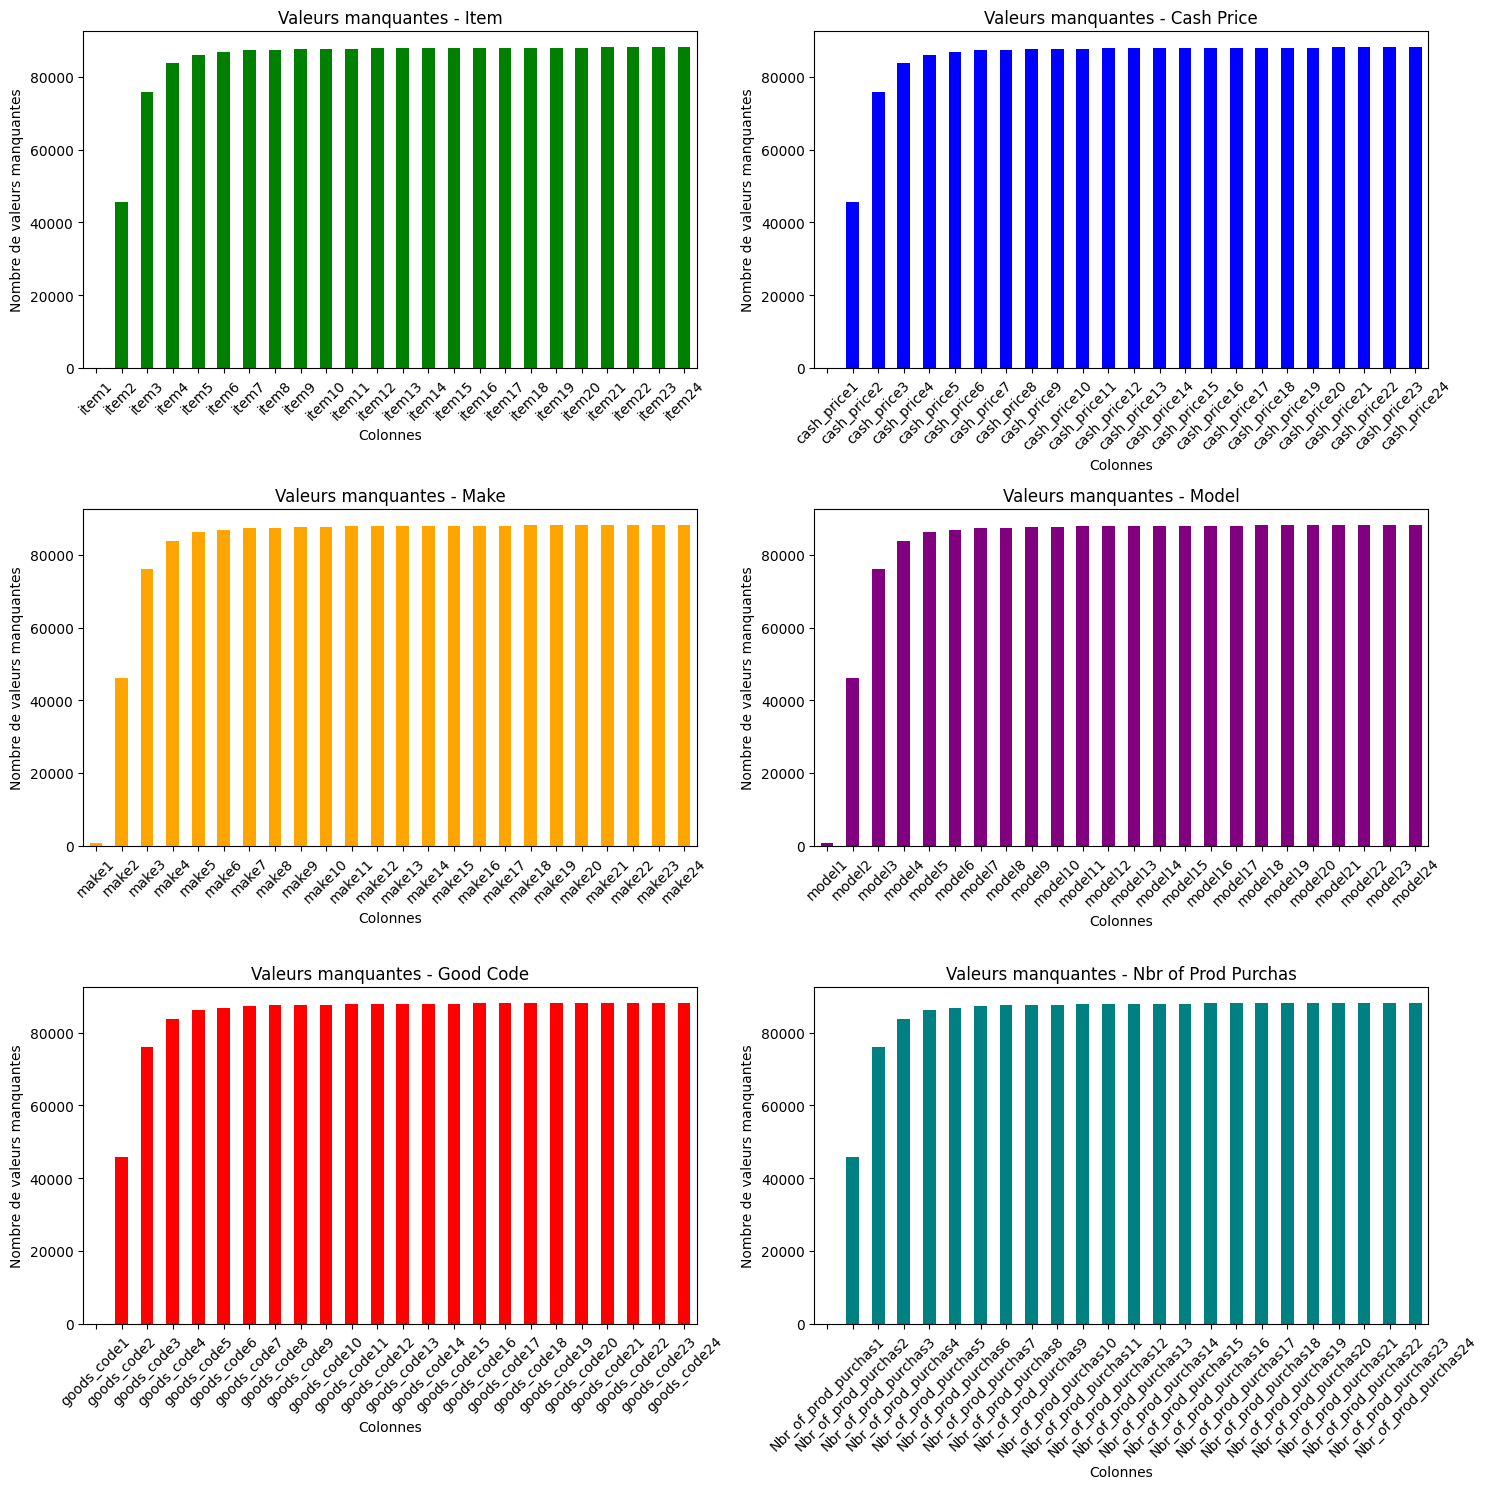

In [ ]:
import matplotlib.pyplot as plt

# Créer une figure et des sous-graphiques (subplots) avec une grille de 3x2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Liste des groupes de valeurs manquantes, des titres et des couleurs
missing_values_groups = [
    missing_values_item,
    missing_values_cash_price,
    missing_values_make,
    missing_values_model,
    missing_values_good_code,
    missing_values_Nbr_of_prod_purchas
]
titles = [
    'Item',
    'Cash Price',
    'Make',
    'Model',
    'Good Code',
    'Nbr of Prod Purchas'
]
colors = ['green', 'blue', 'orange', 'purple', 'red', 'teal']

for i, (missing_values, title, color) in enumerate(zip(missing_values_groups, titles, colors)):
    row = i // 2  # Calcul de la ligne
    col = i % 2   # Calcul de la colonne
    missing_values.plot(kind='bar', color=color, ax=axes[row, col])
    axes[row, col].set_title(f'Valeurs manquantes - {title}')
    axes[row, col].set_xlabel('Colonnes')
    axes[row, col].set_ylabel('Nombre de valeurs manquantes')
    axes[row, col].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()



# Imputation des valeurs manquantes






*   item1 à item24 (Char)
*   cash_price1 à cash_price24 (Num)
*   make1 à make24 (Char)
*   model1 à model24 (Char)
*   goods_code1 à goods_code24 (Char)
*   Nbr_of_prod_purchas1 (Num)
*   Nombre de produits (int)





In [ ]:
# Afficher les types de données pour chaque segmentation
print("Types de données de la tranche 1:25 :")
print(x_train.iloc[:, 1:25].dtypes)
print("\nTypes de données de la tranche 25:49 :")
print(x_train.iloc[:, 25:49].dtypes)
print("\nTypes de données de la tranche 49:73 :")
print(x_train.iloc[:, 49:73].dtypes)
print("\nTypes de données de la tranche 73:97 :")
print(x_train.iloc[:, 73:97].dtypes)
print("\nTypes de données de la tranche 97:121 :")
print(x_train.iloc[:, 97:121].dtypes)
print("\nTypes de données de la tranche 121:145 :")
print(x_train.iloc[:, 121:145].dtypes)


Types de données de la tranche 1:25 :
item1     object
item2     object
item3     object
item4     object
item5     object
item6     object
item7     object
item8     object
item9     object
item10    object
item11    object
item12    object
item13    object
item14    object
item15    object
item16    object
item17    object
item18    object
item19    object
item20    object
item21    object
item22    object
item23    object
item24    object
dtype: object

Types de données de la tranche 25:49 :
cash_price1     float64
cash_price2     float64
cash_price3     float64
cash_price4     float64
cash_price5     float64
cash_price6     float64
cash_price7     float64
cash_price8     float64
cash_price9     float64
cash_price10    float64
cash_price11    float64
cash_price12    float64
cash_price13    float64
cash_price14    float64
cash_price15    float64
cash_price16    float64
cash_price17    float64
cash_price18    float64
cash_price19    float64
cash_price20    float64
cash_price21    floa

In [ ]:
x_train.iloc[:, 1:25] = x_train.iloc[:, 1:25].fillna("No_item")
x_train.iloc[:, 25:49] = x_train.iloc[:, 25:49].fillna(0)
x_train.iloc[:, 49:73] = x_train.iloc[:, 49:73].fillna("No_make")
x_train.iloc[:, 73:97] = x_train.iloc[:, 73:97].fillna("No_model")
x_train.iloc[:, 97:121] = x_train.iloc[:, 97:121].fillna("000000000")
x_train.iloc[:, 121:145] = x_train.iloc[:, 121:145].fillna(0)
x_train["Nb_of_items"] = x_train["Nb_of_items"].fillna(1)

In [ ]:
X_test.iloc[:, 1:25] = X_test.iloc[:, 1:25].fillna("No_item")
X_test.iloc[:, 25:49] = X_test.iloc[:, 25:49].fillna(0)
X_test.iloc[:, 49:73] = X_test.iloc[:, 49:73].fillna("No_make")
X_test.iloc[:, 73:97] = X_test.iloc[:, 73:97].fillna("No_model")
X_test.iloc[:, 97:121] = X_test.iloc[:, 97:121].fillna("000000000")
X_test.iloc[:, 121:145] = X_test.iloc[:, 121:145].fillna(0)
X_test["Nb_of_items"] = X_test["Nb_of_items"].fillna(1)

<ipython-input-6-bd0665169eec>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        000000000
1        000000000
2        000000000
3        000000000
4        000000000
           ...    
23193    000000000
23194    000000000
23195    000000000
23196    000000000
23197    000000000
Name: goods_code23, Length: 23198, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_test.iloc[:, 97:121] = X_test.iloc[:, 97:121].fillna("000000000")
<ipython-input-6-bd0665169eec>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        000000000
1        000000000
2        000000000
3        000000000
4        000000000
           ...    
23193    000000000
23194    000000000
23195    000000000
23196    000000000
23197    000000000
Name: goods_code24, Length: 23198, dtype: object' has dtype incompati

In [ ]:
#convertir les types d'objet en chaine de caractere
x_train.iloc[:, 1:25] = x_train.iloc[:, 1:25].astype(str)
x_train.iloc[:, 49:73] = x_train.iloc[:, 49:73].astype(str)
x_train.iloc[:, 73:97] = x_train.iloc[:, 73:97].astype(str)
x_train.iloc[:, 97:121] = x_train.iloc[:, 97:121] .astype(str)

In [ ]:
#convertir les types d'objet en chaine de caractere
X_test.iloc[:, 1:25] = X_test.iloc[:, 1:25].astype(str)
X_test.iloc[:, 49:73] = X_test.iloc[:, 49:73].astype(str)
X_test.iloc[:, 73:97] = X_test.iloc[:, 73:97].astype(str)
X_test.iloc[:, 97:121] = X_test.iloc[:, 97:121] .astype(str)

In [ ]:
X_test.isna().sum().sum()

0

In [ ]:
x_train.isna().sum().sum()

0

plus aucune valeurs manquantes present

In [ ]:
data = pd.merge(x_train,y_train , on = 'ID', how= 'inner')
data = data.drop(columns=['index'])

In [ ]:
data.shape
data

ID                             item1  \
0      85517                         COMPUTERS   
1      51113  COMPUTER PERIPHERALS ACCESSORIES   
2      83008           TELEVISIONS HOME CINEMA   
3      78712                         COMPUTERS   
4      77846           TELEVISIONS HOME CINEMA   
...      ...                               ...   
88158   4781                         COMPUTERS   
88159  86763                         COMPUTERS   
88160  37085                         COMPUTERS   
88161   7207                         COMPUTERS   
88162  80075                 BEDROOM FURNITURE   

                                  item2              item3              item4  \
0                               No_item            No_item            No_item   
1                               No_item            No_item            No_item   
2                               No_item            No_item            No_item   
3      COMPUTER PERIPHERALS ACCESSORIES            No_item            No_item   
4                               No_item            No_item            No_item   
...                                 ...                ...                ...   
88158                 FULFILMENT CHARGE            No_item            No_item   
88159                           No_item            No_item            No_item   
88160                           No_item            No_item            No_item   
88161                 FULFILMENT CHARGE            No_item            No_item   
88162                           SERVICE  BEDROOM FURNITURE  FULFILMENT CHARGE   

         item5    item6    item7    item8    item9  ... Nbr_of_prod_purchas17  \
0      No_item  No_item  No_item  No_item  No_item  ...                   0.0   
1      No_item  No_item  No_item  No_item  No_item  ...                   0.0   
2      No_item  No_item  No_item  No_item  No_item  ...                   0.0   
3      No_item  No_item  No_item  No_item  No_item  ...                   0.0   
4      No_item  No_item  No_item  No_item  No_item  ...                   0.0   
...        ...      ...      ...      ...      ...  ...                   ...   
88158  No_item  No_item  No_item  No_item  No_item  ...                   0.0   
88159  No_item  No_item  No_item  No_item  No_item  ...                   0.0   
88160  No_item  No_item  No_item  No_item  No_item  ...                   0.0   
88161  No_item  No_item  No_item  No_item  No_item  ...                   0.0   
88162  No_item  No_item  No_item  No_item  No_item  ...                   0.0   

      Nbr_of_prod_purchas18 Nbr_of_prod_purchas19 Nbr_of_prod_purchas20  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
88158                   0.0                   0.0                   0.0   
88159                   0.0                   0.0                   0.0   
88160                   0.0                   0.0                   0.0   
88161                   0.0                   0.0                   0.0   
88162                   0.0                   0.0                   0.0   

      Nbr_of_prod_purchas21 Nbr_of_prod_purchas22 Nbr_of_prod_purchas23  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
88158                   0.0          

# TRANSFORMATION DES DONNEES


In [ ]:
# Listes des colonnes multivaluées
columns_base = ['item', 'cash_price', 'make', 'model', 'goods_code', 'Nbr_of_prod_purchas']
max_items = 24

# Création d'une liste pour les colonnes multivaluées
all_columns = {col: [f"{col}{i}" for i in range(1, max_items + 1)] for col in columns_base}

# Initialisation du DataFrame normalisé
df_long = pd.DataFrame()

# Transformation des données
for i in range(1, max_items + 1):
    # Pour chaque item, extrayez les colonnes correspondantes
    temp = data[['ID', f'item{i}', f'cash_price{i}', f'make{i}', f'model{i}', f'goods_code{i}', f'Nbr_of_prod_purchas{i}']].copy()
    temp.columns = ['ID', 'item', 'cash_price', 'make', 'model', 'goods_code', 'Nbr_of_prod_purchas']  # Renommer les colonnes

    # Ajout d'une colonne pour identifier l'index de l'item
    temp['item_index'] = i

    # Filtrer les lignes non vides (éliminer les items inexistants)
    temp = temp.dropna(subset=['item'])  # Supposons que 'item' est toujours renseigné si l'item existe

    # Ajouter les données au DataFrame final
    df_long = pd.concat([df_long, temp], ignore_index=True)
df_long = df_long[df_long['item'] != "No_item"]

df_long

In [ ]:
# Listes des colonnes multivaluées
columns_base = ['item', 'cash_price', 'make', 'model', 'goods_code', 'Nbr_of_prod_purchas']
max_items = 24

# Création d'une liste pour les colonnes multivaluées
all_columns = {col: [f"{col}{i}" for i in range(1, max_items + 1)] for col in columns_base}

# Initialisation du DataFrame normalisé
df_long = pd.DataFrame()

# Transformation des données
for i in range(1, max_items + 1):
    # Pour chaque item, extrayez les colonnes correspondantes
    temp = X_test[['ID', f'item{i}', f'cash_price{i}', f'make{i}', f'model{i}', f'goods_code{i}', f'Nbr_of_prod_purchas{i}']].copy()
    temp.columns = ['ID', 'item', 'cash_price', 'make', 'model', 'goods_code', 'Nbr_of_prod_purchas']  # Renommer les colonnes

    # Ajout d'une colonne pour identifier l'index de l'item
    temp['item_index'] = i

    # Filtrer les lignes non vides (éliminer les items inexistants)
    temp = temp.dropna(subset=['item'])  # Supposons que 'item' est toujours renseigné si l'item existe

    # Ajouter les données au DataFrame final
    df_long = pd.concat([df_long, temp], ignore_index=True)
df_long = df_long[df_long['item'] != "No_item"]

df_long

ID                              item  cash_price             make  \
0       64707          HEALTH BEAUTY ELECTRICAL       399.0            DYSON   
1       63919  COMPUTER PERIPHERALS ACCESSORIES       294.0          SAMSUNG   
2       15664                         COMPUTERS       929.0            APPLE   
3        6626                         COMPUTERS       539.0            APPLE   
4       26766                         COMPUTERS      2470.0            APPLE   
...       ...                               ...         ...              ...   
548695  52949          KITCHEN UTENSILS GADGETS         6.0         RETAILER   
552298  48270                         TABLEWARE        40.0         RETAILER   
553106  83026                      FOOD STORAGE        55.0              OXO   
556312  72929           LIVING DINING FURNITURE       343.0         WEST ELM   
556386  68670                  SOFT FURNISHINGS        15.0  ANYDAY RETAILER   

                                                    model   goods_code  \
0              DYSON CORRALE CORD-FREE HAIR STRAIGHTENERS    238602413   
1       SAMSUNG GALAXY WATCH 4 CLASSIC BLUETOOTH 46MM ...    240192738   
2                                  2020 APPLE MACBOOK AIR    239246782   
3                               2020 APPLE IPAD AIR 10.9"    239001428   
4       2019 APPLE MACBOOK PRO 16 TOUCH BAR INTEL CORE I9    238449040   
...                                                   ...          ...   
548695               RETAILER STAINLESS STEEL PIZZA WHEEL  237464222.0   
552298            RETAILER GEOMETRIC PATTERN LARGE MELAMI  238425912.0   
553106  OXO POP SQUARE PLASTIC KITCHEN STORAGE CONTAINERS  240184899.0   
556312  WEST ELM ROUND MARBLE NESTING SIDE TABLE WHITE...  237192607.0   
556386            ANYDAY RETAILER SUMMER GARDEN CUSHION G  239944967.0   

        Nbr_of_prod_purchas  item_index  
0                       1.0           1  
1                       1.0           1  
2                       1.0           1  
3                       1.0           1  
4                       1.0           1  
...                     ...         ...  
548695                  1.0          24  
552298                  2.0          24  
553106                  1.0          24  
556312                  1.0          24  
556386                  1.0          24  

[41042 rows x 8 columns]

item
COMPUTERS                                    1094
FULFILMENT CHARGE                             531
TELEPHONES, FAX MACHINES & TWO-WAY RADIOS      81
AUDIO ACCESSORIES                              75
COMPUTER PERIPHERALS ACCESSORIES               70
TELEVISIONS HOME CINEMA                        61
TELEPHONES FAX MACHINES TWO-WAY RADIOS         40
BABY CHILD TRAVEL                              31
WARRANTY                                       20
TABLEWARE                                      20
Name: count, dtype: int64


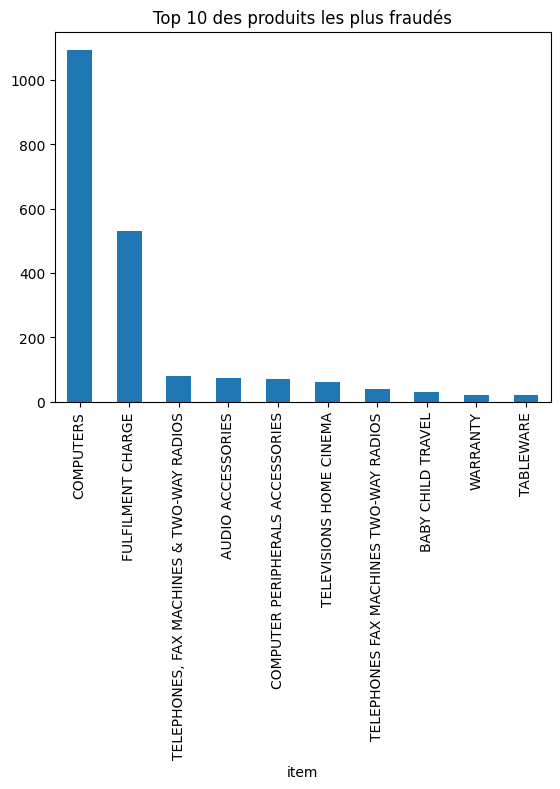

In [ ]:
# Analyser les produits les plus fréquents dans les cas de fraude
fraud_items = df_long[df_long['ID'].isin(y_train[y_train['fraud_flag'] == 1]['ID'])]
fraud_item_counts = fraud_items['item'].value_counts()

# Afficher les 10 produits les plus fréquents dans les cas de fraude
print(fraud_item_counts.head(10))

# Visualiser les produits les plus fréquents dans les cas de fraude
fraud_item_counts.head(10).plot(kind='bar', title='Top 10 des produits les plus fraudés')
plt.show()

In [ ]:
import pandas as pd

# Normaliser les poids des produits frauduleux (plus le produit est fraudé, plus son poids est élevé)
fraud_weights = fraud_item_counts / fraud_item_counts.max()

# Étape 2 : Associer un poids de risque aux utilisateurs
df_long['fraud_risk'] = df_long['item'].map(fraud_weights).fillna(0)

# Étape 3 : Calculer un score de risque global pour chaque utilisateur
user_risk_scores = df_long.groupby('ID')['fraud_risk'].sum().reset_index()

# Renommer la colonne pour plus de clarté
user_risk_scores = user_risk_scores.rename(columns={'fraud_risk': 'risk_score'})

# Afficher les utilisateurs avec les scores de risque les plus élevés
print(user_risk_scores.sort_values(by='risk_score', ascending=False).head(10))


           ID  risk_score
42449   55808    4.549360
78333  103079    3.634369
26535   34852    3.613346
30134   39571    3.485375
59268   77987    3.485375
73904   97197    3.054845
60361   79430    3.054845
78176  102872    3.002742
45943   60457    3.000000
36065   47421    3.000000


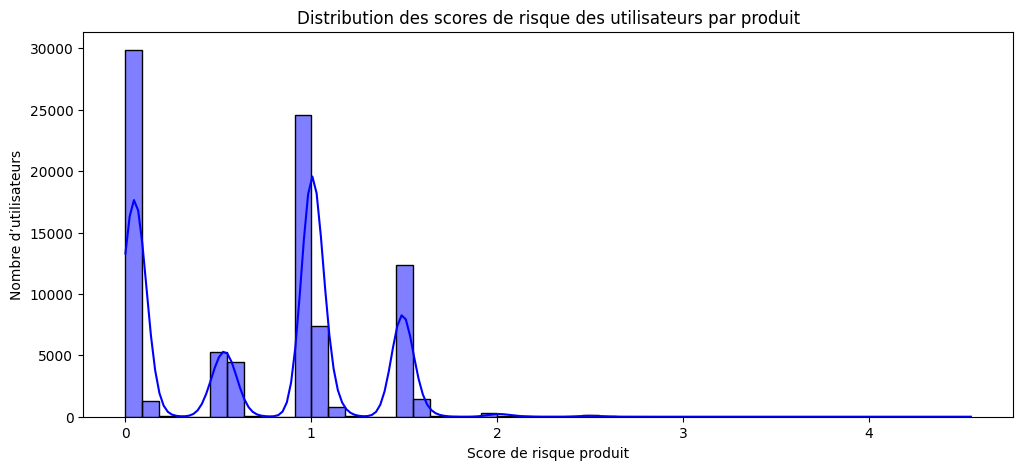

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(user_risk_scores['risk_score'], bins=50, kde=True, color='blue')
plt.xlabel('Score de risque produit')
plt.ylabel('Nombre d’utilisateurs')
plt.title('Distribution des scores de risque des utilisateurs par produit')
plt.show()


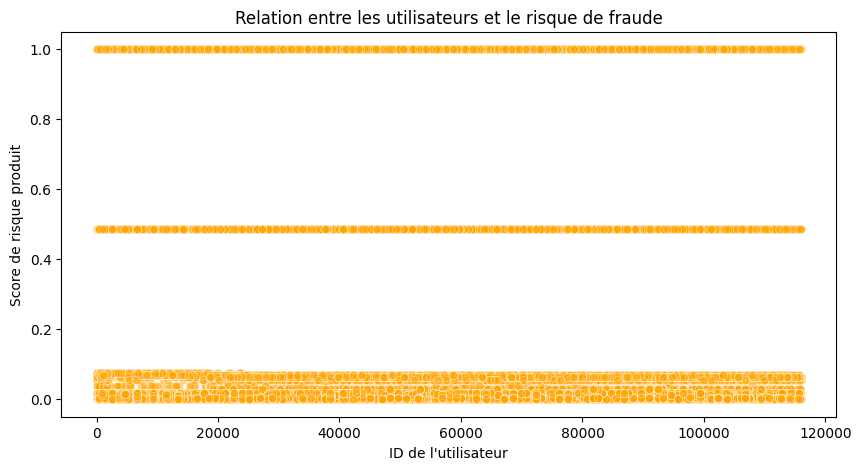

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_long, x='ID', y='fraud_risk', alpha=0.5, color='orange')
plt.xlabel("ID de l'utilisateur")
plt.ylabel("Score de risque produit")
plt.title("Relation entre les utilisateurs et le risque de fraude")
plt.show()


make
APPLE         1321
RETAILER       605
SAMSUNG         83
LG              20
BUGABOO         14
LE CREUSET      12
No_make         11
OXO             10
SONY             9
MAXI-COSI        9
Name: count, dtype: int64


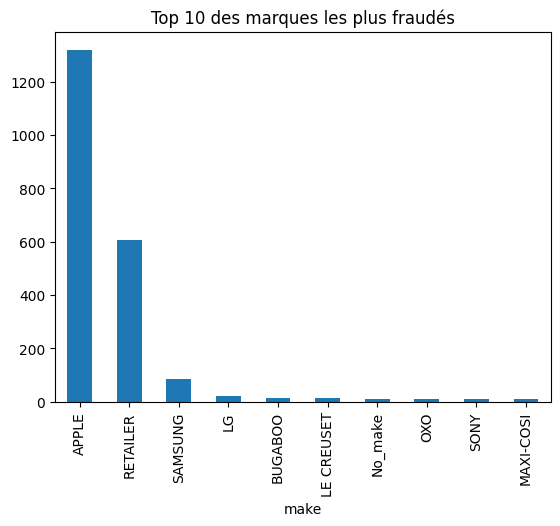

In [ ]:
# Analyser les produits les plus fréquents dans les cas de fraude
fraud_make = df_long[df_long['ID'].isin(y_train[y_train['fraud_flag'] == 1]['ID'])]
fraud_make_counts = fraud_make['make'].value_counts()

# Afficher les 10 produits les plus fréquents dans les cas de fraude
print(fraud_make_counts.head(10))

# Visualiser les produits les plus fréquents dans les cas de fraude
fraud_make_counts.head(10).plot(kind='bar', title='Top 10 des marques les plus fraudés')
plt.show()

In [ ]:
import pandas as pd

# Normaliser les poids des produits frauduleux (plus le produit est fraudé, plus son poids est élevé)
fraud_weights_make = fraud_make_counts / fraud_make_counts.max()

# Étape 2 : Associer un poids de risque aux utilisateurs
df_long['fraud_risk_make'] = df_long['make'].map(fraud_weights_make).fillna(0)

# Étape 3 : Calculer un score de risque global pour chaque utilisateur
user_risk_scores_make = df_long.groupby('ID')['fraud_risk_make'].sum().reset_index()

# Renommer la colonne pour plus de clarté
user_risk_scores_make = user_risk_scores_make.rename(columns={'fraud_risk_make': 'risk_score_make'})

# Afficher les utilisateurs avec les scores de risque les plus élevés
print(user_risk_scores_make.sort_values(by='risk_score_make', ascending=False).head(10))

           ID  risk_score_make
82466  103079        10.452912
26452   32961         9.000000
20104   25069         8.452912
78141   97633         8.173976
25559   31827         8.000000
23771   29613         7.714594
36120   45063         7.704529
78763   98432         7.452912
75843   94776         7.452912
57933   72407         7.434939


model
RETAILER                                              674
2020 APPLE MACBOOK PRO 13 TOUCH BAR M1 PROCESSOR 8    165
2021 APPLE MACBOOK PRO 14 M1 PRO PROCESSOR 16GB RA    149
2020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 PROC    146
2021 APPLE MACBOOK PRO 16 M1 PRO PROCESSOR 16GB RA     73
2021 APPLE IPAD PRO 11 M1 PROCESSOR IOS WI-FI 128G     70
2021 APPLE IPAD PRO 12 9 M1 PROCESSOR IOS WI-FI CE     63
2020 APPLE MACBOOK PRO 13 TOUCH BAR INTEL CORE I5      49
2021 APPLE IPAD PRO 12 9 M1 PROCESSOR IOS WI-FI 25     40
2021 APPLE IPAD PRO 12 9 M1 PROCESSOR IOS WI-FI 12     36
Name: count, dtype: int64


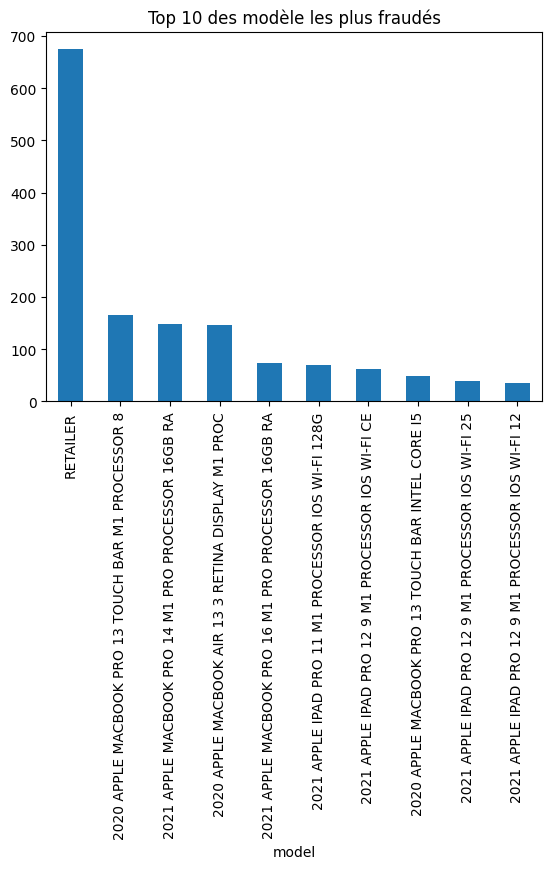

In [ ]:
# Analyser les produits les plus fréquents dans les cas de fraude
fraud_model = df_long[df_long['ID'].isin(y_train[y_train['fraud_flag'] == 1]['ID'])]
fraud_model_counts = fraud_make['model'].value_counts()

# Afficher les 10 produits les plus fréquents dans les cas de fraude
print(fraud_model_counts.head(10))

# Visualiser les produits les plus fréquents dans les cas de fraude
fraud_model_counts.head(10).plot(kind='bar', title='Top 10 des modèle les plus fraudés')
plt.show()

In [ ]:
import pandas as pd

# Normaliser les poids des produits frauduleux (plus le produit est fraudé, plus son poids est élevé)
fraud_weights_model = fraud_model_counts / fraud_model_counts.max()

# Étape 2 : Associer un poids de risque aux utilisateurs
df_long['fraud_risk_model'] = df_long['model'].map(fraud_weights_model).fillna(0)

# Étape 3 : Calculer un score de risque global pour chaque utilisateur
user_risk_scores_model = df_long.groupby('ID')['fraud_risk_model'].sum().reset_index()

# Renommer la colonne pour plus de clarté
user_risk_scores_model = user_risk_scores_model.rename(columns={'fraud_risk_model': 'risk_score_model'})

# Afficher les utilisateurs avec les scores de risque les plus élevés
print(user_risk_scores_model.sort_values(by='risk_score_model', ascending=False).head(10))

          ID  risk_score_model
3751    4724              24.0
9108   11398              23.0
5327    6664              23.0
3569    4494              22.0
14749  18474              22.0
7455    9320              22.0
9368   11749              21.0
9109   11399              21.0
3382    4244              20.0
2915    3669              20.0


In [ ]:
# Agréger les caractéristiques par panier (ID)
aggregations = {
    'cash_price': ['sum', 'mean', 'std', 'max', 'min'],  # Statistiques sur les prix
    'Nbr_of_prod_purchas': ['sum', 'mean', 'std', 'max', 'min'],  # Total des produits achetés
    'item': 'nunique',  # Diversité des catégories de biens
    'make': 'nunique',  # Diversité des fabricants
    'model': 'nunique',  # Diversité des modèles
    'goods_code': 'nunique'  # Diversité des codes produits
}

# Effectuer l'agrégation
df_aggregated = df_long.groupby('ID').agg(aggregations)

# Ajuster les noms des colonnes pour éviter les tuples (MultiIndex)
df_aggregated.columns = ['_'.join(col).strip() for col in df_aggregated.columns]

# Ajouter le comptage total des items par panier
df_aggregated['Nb_of_items'] = df_long.groupby('ID')['item'].count()

# Réinitialiser l'index pour retrouver un DataFrame
# df_aggregated = df_aggregated.reset_index()
# df_aggregated = pd.merge(df_aggregated,user_risk_scores , on = 'ID', how= 'inner')
# df_aggregated = pd.merge(df_aggregated,user_risk_scores_make , on = 'ID', how= 'inner')
# df_aggregated = pd.merge(df_aggregated,user_risk_scores_model , on = 'ID', how= 'inner')


In [ ]:
df_aggregated

cash_price_sum  cash_price_mean  cash_price_std  cash_price_max  \
ID                                                                        
3               1118.0           559.00      622.253967           999.0   
6                674.0           337.00      476.589971           674.0   
9                944.0           472.00      657.609307           937.0   
12               349.0           349.00             NaN           349.0   
14              1849.0           924.50     1307.440438          1849.0   
...                ...              ...             ...             ...   
115972           696.0           139.20      182.165310           459.0   
115979          1507.0           376.75      469.536207          1052.0   
115980          1769.0          1769.00             NaN          1769.0   
115986          1416.0           472.00      334.528026           837.0   
115987           369.0           369.00             NaN           369.0   

        cash_price_min  Nbr_of_prod_purchas_sum  Nbr_of_prod_purchas_mean  \
ID                                                                          
3                119.0                      2.0                  1.000000   
6                  0.0                      2.0                  1.000000   
9                  7.0                      2.0                  1.000000   
12               349.0                      1.0                  1.000000   
14                 0.0                      2.0                  1.000000   
...                ...                      ...                       ...   
115972            15.0                      5.0                  1.000000   
115979             7.0                      4.0                  1.000000   
115980          1769.0                      1.0                  1.000000   
115986           180.0                      7.0                  2.333333   
115987           369.0                      1.0                  1.000000   

        Nbr_of_prod_purchas_std  Nbr_of_prod_purchas_max  \
ID                                                         
3                      0.000000                      1.0   
6                      0.000000                      1.0   
9                      0.000000                      1.0   
12                          NaN                      1.0   
14                     0.000000                      1.0   
...                         ...                      ...   
115972                 0.000000                      1.0   
115979                 0.000000                      1.0   
115980                      NaN                      1.0   
115986                 1.154701                      3.0   
115987                      NaN                      1.0   

        Nbr_of_prod_purchas_min  item_nunique  make_nunique  model_nunique  \
ID                                                                           
3                           1.0             2             1              2   
6                           1.0             2             2              2   
9                           1.0             2             2              2   
12                          1.0             1             1              1   
14                          1.0             2             2              2   
...                         ...           ...           ...            ...   
115972                      1.0             4             3              5   
115979                      1.0             3             2              4   
115980                      1.0             1             1              1   
115986                      1.0             2             1              3   
115987                      1.0             1             1              1   

        goods_code_nunique  Nb_of_items  
ID                                       
3                        2            2  
6                        2            2  
9                        2            2  
12                      

NOUS ALLONS IMPUTER LES STD NAN PAR 0 : j'arrive avec l'explication

In [ ]:
df_aggregated.isna().sum()

cash_price_sum                  0
cash_price_mean                 0
cash_price_std              11920
cash_price_max                  0
cash_price_min                  0
Nbr_of_prod_purchas_sum         0
Nbr_of_prod_purchas_mean        0
Nbr_of_prod_purchas_std     11920
Nbr_of_prod_purchas_max         0
Nbr_of_prod_purchas_min         0
item_nunique                    0
make_nunique                    0
model_nunique                   0
goods_code_nunique              0
Nb_of_items                     0
dtype: int64

In [ ]:
df_aggregated["cash_price_std"] = df_aggregated["cash_price_std"].fillna(0)
df_aggregated["Nbr_of_prod_purchas_std"] = df_aggregated["Nbr_of_prod_purchas_std"].fillna(0)

In [ ]:
df_aggregated

cash_price_sum  cash_price_mean  cash_price_std  cash_price_max  \
ID                                                                        
3               1118.0           559.00      622.253967           999.0   
6                674.0           337.00      476.589971           674.0   
9                944.0           472.00      657.609307           937.0   
12               349.0           349.00        0.000000           349.0   
14              1849.0           924.50     1307.440438          1849.0   
...                ...              ...             ...             ...   
115972           696.0           139.20      182.165310           459.0   
115979          1507.0           376.75      469.536207          1052.0   
115980          1769.0          1769.00        0.000000          1769.0   
115986          1416.0           472.00      334.528026           837.0   
115987           369.0           369.00        0.000000           369.0   

        cash_price_min  Nbr_of_prod_purchas_sum  Nbr_of_prod_purchas_mean  \
ID                                                                          
3                119.0                      2.0                  1.000000   
6                  0.0                      2.0                  1.000000   
9                  7.0                      2.0                  1.000000   
12               349.0                      1.0                  1.000000   
14                 0.0                      2.0                  1.000000   
...                ...                      ...                       ...   
115972            15.0                      5.0                  1.000000   
115979             7.0                      4.0                  1.000000   
115980          1769.0                      1.0                  1.000000   
115986           180.0                      7.0                  2.333333   
115987           369.0                      1.0                  1.000000   

        Nbr_of_prod_purchas_std  Nbr_of_prod_purchas_max  \
ID                                                         
3                      0.000000                      1.0   
6                      0.000000                      1.0   
9                      0.000000                      1.0   
12                     0.000000                      1.0   
14                     0.000000                      1.0   
...                         ...                      ...   
115972                 0.000000                      1.0   
115979                 0.000000                      1.0   
115980                 0.000000                      1.0   
115986                 1.154701                      3.0   
115987                 0.000000                      1.0   

        Nbr_of_prod_purchas_min  item_nunique  make_nunique  model_nunique  \
ID                                                                           
3                           1.0             2             1              2   
6                           1.0             2             2              2   
9                           1.0             2             2              2   
12                          1.0             1             1              1   
14                          1.0             2             2              2   
...                         ...           ...           ...            ...   
115972                      1.0             4             3              5   
115979                      1.0             3             2              4   
115980                      1.0             1             1              1   
115986                      1.0             2             1              3   
115987                      1.0             1             1              1   

        goods_code_nunique  Nb_of_items  
ID                                       
3                        2            2  
6                        2            2  
9                        2            2  
12                      

In [ ]:
df_aggregated["cash_price_per_purchase"] = df_aggregated["cash_price_sum"]/df_aggregated["Nbr_of_prod_purchas_sum"]
df_aggregated["purchase_per_item"] = df_aggregated["Nbr_of_prod_purchas_sum"]/df_aggregated["Nb_of_items"]
df_aggregated["item_make_diversity"] = df_aggregated["item_nunique"] * df_aggregated["make_nunique"]
df_aggregated["make_model_diversity"] = df_aggregated["make_nunique"] * df_aggregated["model_nunique"]
#df["high_risk_indicator"] = (df["total_cash_price"] > 5000) & (df["Nb_of_items"] < 3)
#df_aggregated['has_expensive_item'] = (df_aggregated['cash_price_max'] > 10000).astype(int)
#df_aggregated['diverse_items_flag'] = (df_aggregated['Nb_of_items'] > 10).astype(int)





In [ ]:
df_aggregated

cash_price_sum  cash_price_mean  cash_price_std  cash_price_max  \
ID                                                                        
3               1118.0           559.00      622.253967           999.0   
6                674.0           337.00      476.589971           674.0   
9                944.0           472.00      657.609307           937.0   
12               349.0           349.00        0.000000           349.0   
14              1849.0           924.50     1307.440438          1849.0   
...                ...              ...             ...             ...   
115972           696.0           139.20      182.165310           459.0   
115979          1507.0           376.75      469.536207          1052.0   
115980          1769.0          1769.00        0.000000          1769.0   
115986          1416.0           472.00      334.528026           837.0   
115987           369.0           369.00        0.000000           369.0   

        cash_price_min  Nbr_of_prod_purchas_sum  Nbr_of_prod_purchas_mean  \
ID                                                                          
3                119.0                      2.0                  1.000000   
6                  0.0                      2.0                  1.000000   
9                  7.0                      2.0                  1.000000   
12               349.0                      1.0                  1.000000   
14                 0.0                      2.0                  1.000000   
...                ...                      ...                       ...   
115972            15.0                      5.0                  1.000000   
115979             7.0                      4.0                  1.000000   
115980          1769.0                      1.0                  1.000000   
115986           180.0                      7.0                  2.333333   
115987           369.0                      1.0                  1.000000   

        Nbr_of_prod_purchas_std  Nbr_of_prod_purchas_max  \
ID                                                         
3                      0.000000                      1.0   
6                      0.000000                      1.0   
9                      0.000000                      1.0   
12                     0.000000                      1.0   
14                     0.000000                      1.0   
...                         ...                      ...   
115972                 0.000000                      1.0   
115979                 0.000000                      1.0   
115980                 0.000000                      1.0   
115986                 1.154701                      3.0   
115987                 0.000000                      1.0   

        Nbr_of_prod_purchas_min  item_nunique  make_nunique  model_nunique  \
ID                                                                           
3                           1.0             2             1              2   
6                           1.0             2             2              2   
9                           1.0             2             2              2   
12                          1.0             1             1              1   
14                          1.0             2             2              2   
...                         ...           ...           ...            ...   
115972                      1.0             4             3              5   
115979                      1.0             3             2              4   
115980                      1.0             1             1              1   
115986                      1.0             2             1              3   
115987                      1.0             1             1              1   

        goods_code_nunique  Nb_of_items  cash_price_per_purchase  \
ID                                                                 
3                        2            2               559.000000   
6                        2    

In [ ]:
data = pd.merge(df_aggregated,y_train , on = 'ID', how= 'inner')
data = data.drop(columns=['index'])
data

ID  cash_price_sum  cash_price_mean  cash_price_std  \
0           0          1295.0       431.666667      707.933142   
1           1          1048.0       524.000000      219.203102   
2           2          1989.0       994.500000     1250.871896   
3           4           999.0       499.500000      706.399674   
4           5           749.0       749.000000        0.000000   
...       ...             ...              ...             ...   
92785  115981          1149.0      1149.000000        0.000000   
92786  115982          1406.0       703.000000      984.292639   
92787  115983           439.0       439.000000        0.000000   
92788  115984           887.0       887.000000        0.000000   
92789  115985           576.0       288.000000      397.394011   

       cash_price_max  cash_price_min  Nbr_of_prod_purchas_sum  \
0              1249.0            11.0                      3.0   
1               679.0           369.0                      2.0   
2              1879.0           110.0                      2.0   
3               999.0             0.0                      2.0   
4               749.0           749.0                      1.0   
...               ...             ...                      ...   
92785          1149.0          1149.0                      1.0   
92786          1399.0             7.0                      2.0   
92787           439.0           439.0                      1.0   
92788           887.0           887.0                      1.0   
92789           569.0             7.0                      2.0   

       Nbr_of_prod_purchas_mean  Nbr_of_prod_purchas_std  \
0                           1.0                      0.0   
1                           1.0                      0.0   
2                           1.0                      0.0   
3                           1.0                      0.0   
4                           1.0                      0.0   
...                         ...                      ...   
92785                       1.0                      0.0   
92786                       1.0                      0.0   
92787                       1.0                      0.0   
92788                       1.0                      0.0   
92789                       1.0                      0.0   

       Nbr_of_prod_purchas_max  ...  goods_code_nunique  Nb_of_items  \
0                          1.0  ...                   3            3   
1                          1.0  ...                   2            2   
2                          1.0  ...                   2            2   
3                          1.0  ...                   2            2   
4                          1.0  ...                   1            1   
...                        ...  ...                 ...          ...   
92785                      1.0  ...                   1            1   
92786                      1.0  ...                   2            2   
92787                      1.0  ...                   1            1   
92788                      1.0  ...                   1            1   
92789                      1.0  ...                   2            2   

       risk_score  risk_score_make  risk_score_model  cash_price_per_purchase  \
0        1.500000         1.905823          2.030043               431.666667   
1        0.003472         0.454349          2.000000               524.000000   
2        0.005208         0.002876          2.000000               994.500000   
3        0.558160         1.452912          1.030043               499.500000   
4        0.000868         0.452912          1.000000               749.000000   
...           ...              ...               ...                      ...   
92785    1.000000         1.000000          0.030043              1149.000000   
92786    1.481771         1.452912          1.002861               703.000000   
92787    0.060764         1.000000          0.000000               439.000000   
92788    1.000000         1.0

In [ ]:
data.describe()

ID  cash_price_sum  cash_price_mean  cash_price_std  \
count   92790.000000    92790.000000     92790.000000    92790.000000   
mean    57968.969070     1234.759554       863.112562      332.841761   
std     33487.595782      771.484197       640.697435      466.238163   
min         0.000000      219.000000        20.750000        0.000000   
25%     28901.250000      779.000000       424.666667        0.000000   
50%     57961.500000     1099.000000       703.833333        0.000000   
75%     86985.750000     1499.000000      1117.000000      611.647366   
max    115985.000000    21995.000000     21995.000000     6503.968173   

       cash_price_max  cash_price_min  Nbr_of_prod_purchas_sum  \
count    92790.000000    92790.000000             92790.000000   
mean      1140.466494      628.109074                 1.853864   
std        693.602559      754.869218                 1.981476   
min         79.000000        0.000000                 1.000000   
25%        719.000000       11.000000                 1.000000   
50%        999.000000      379.000000                 1.000000   
75%       1379.000000     1049.000000                 2.000000   
max      21995.000000    21995.000000                98.000000   

       Nbr_of_prod_purchas_mean  Nbr_of_prod_purchas_std  \
count              92790.000000             92790.000000   
mean                   1.029176                 0.025002   
std                    0.281946                 0.202642   
min                    1.000000                 0.000000   
25%                    1.000000                 0.000000   
50%                    1.000000                 0.000000   
75%                    1.000000                 0.000000   
max                   40.000000                18.248288   

       Nbr_of_prod_purchas_max  ...  goods_code_nunique   Nb_of_items  \
count             92790.000000  ...        92790.000000  92790.000000   
mean                  1.062259  ...            1.758692      1.760502   
std                   0.493230  ...            1.375387      1.379435   
min                   1.000000  ...            1.000000      1.000000   
25%                   1.000000  ...            1.000000      1.000000   
50%                   1.000000  ...            1.000000      1.000000   
75%                   1.000000  ...            2.000000      2.000000   
max                  40.000000  ...           24.000000     24.000000   

         risk_score  risk_score_make  risk_score_model  \
count  92790.000000     92790.000000      92790.000000   
mean       0.698743         1.082203          0.531537   
std        0.551062         0.734478          0.847376   
min        0.000000         0.000000          0.000000   
25%        0.060764         0.905823          0.002861   
50%        1.000000         1.000000          0.223176   
75%        1.002604         1.452912          1.005722   
max        4.542535        10.452912         24.000000   

       cash_price_per_purchase  purchase_per_item  item_make_diversity  \
count             92790.000000       92790.000000         92790.000000   
mean                850.122979           1.029176             2.745921   
std                 631.316025           0.281946             4.674973   
min                   8.426966           1.000000             1.000000   
25%                 409.500000           1.000000             1.000000   
50%                 699.000000           1.000000             1.000000   
75%                1117.000000           1.000000             4.000000   
max               21995.000000          40.000000           240.000000   

       make_model_diversity    fraud_flag  
count          92790.000000  92790.000000  
mean               2.950469      0.014215  
std                8.125693      0.118376  
min                1.000000      0.000000  
25%                1.000000      0.000000  
50%                1.000000      0.000000  
75%                4.000000      0.000000  
max              432.000

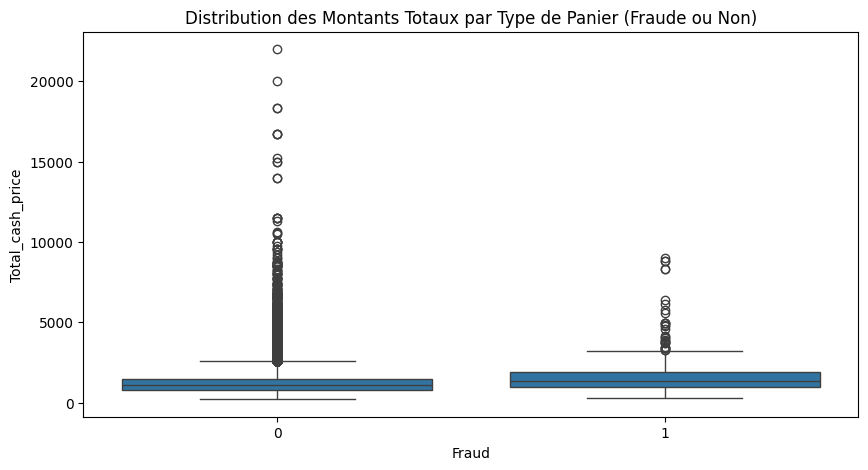

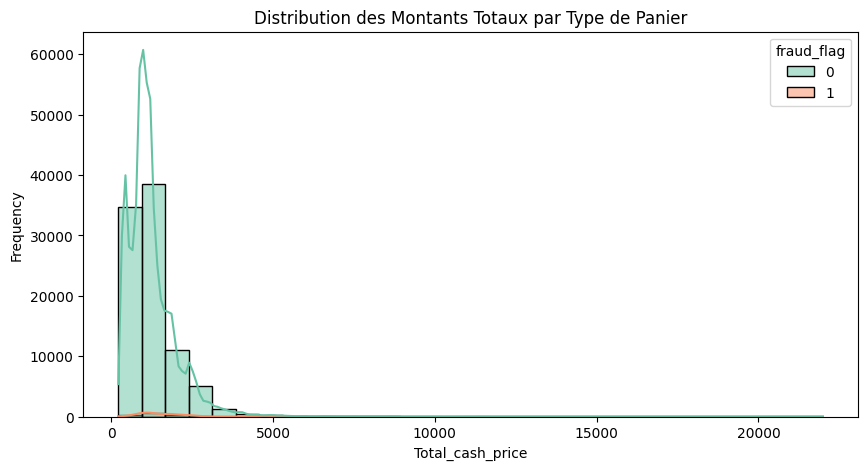

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot de Total_cash_price
plt.figure(figsize=(10, 5))
sns.boxplot(x='fraud_flag', y='cash_price_sum', data=data)
plt.title('Distribution des Montants Totaux par Type de Panier (Fraude ou Non)')
plt.xlabel('Fraud')
plt.ylabel('Total_cash_price')
plt.show()

# Histogramme de Total_cash_price
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='cash_price_sum', hue='fraud_flag', kde=True, bins=30, palette='Set2')
plt.title('Distribution des Montants Totaux par Type de Panier')
plt.xlabel('Total_cash_price')
plt.ylabel('Frequency')
plt.show()


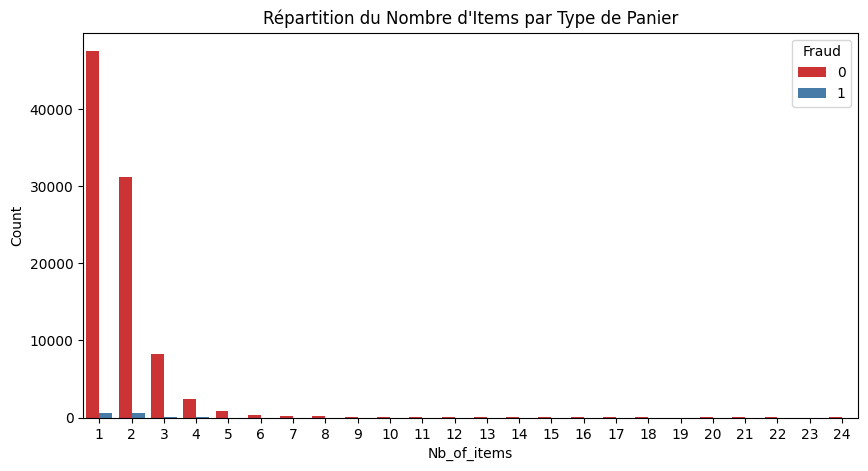

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Nb_of_items', hue='fraud_flag', palette='Set1')
plt.title('Répartition du Nombre d\'Items par Type de Panier')
plt.xlabel('Nb_of_items')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.show()


<ipython-input-32-daadca96d882>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fraud_flag', y='cash_price_mean', data=data, palette='Set3', scale='width')
<ipython-input-32-daadca96d882>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='fraud_flag', y='cash_price_mean', data=data, palette='Set3', scale='width')


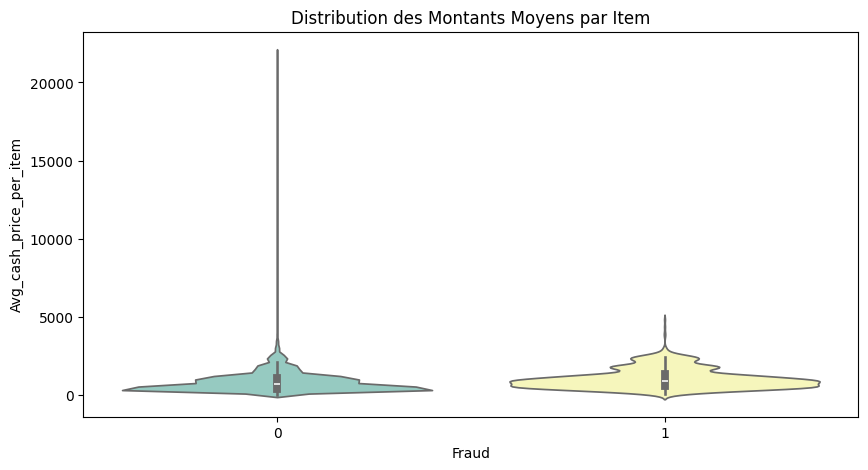

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='fraud_flag', y='cash_price_mean', data=data, palette='Set3', scale='width')
plt.title('Distribution des Montants Moyens par Item')
plt.xlabel('Fraud')
plt.ylabel('Avg_cash_price_per_item')
plt.show()

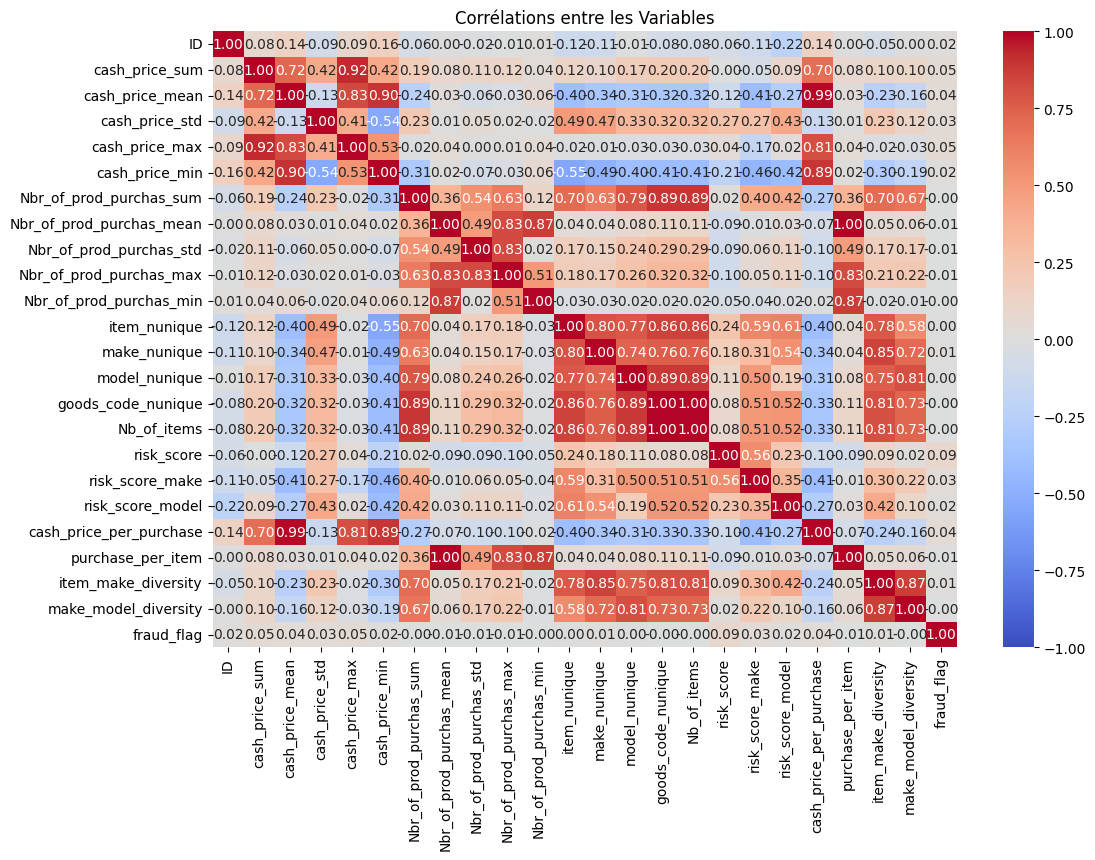

In [ ]:
# Corrélations
corr_matrix = data.corr()

# Heatmap des corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Corrélations entre les Variables')
plt.show()


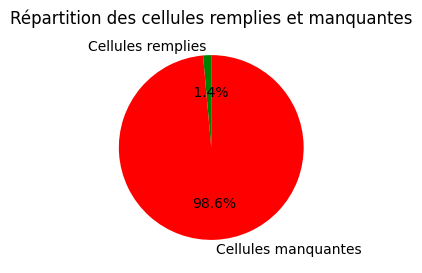

In [ ]:
data_pie = [data['fraud_flag'][data['fraud_flag'] == 1].count(), data['fraud_flag'][data['fraud_flag'] == 0].count()]
labels = ['Cellules remplies', 'Cellules manquantes']
colors = ['green', 'red']  # Choix des couleurs

# Création du pie chart
plt.figure(figsize=(3, 3))
plt.pie(data_pie, labels=labels, autopct='%4.1f%%', startangle=90, colors=colors)
plt.title('Répartition des cellules remplies et manquantes')
plt.show()

In [ ]:
X = data.iloc[:, 1:-2]  # Caractéristiques (features)
y = data['fraud_flag']  # Classes (labels)

##C'est bon ici

In [ ]:
X

cash_price_sum  cash_price_mean  cash_price_std  cash_price_max  \
0              1295.0       431.666667      707.933142          1249.0   
1              1048.0       524.000000      219.203102           679.0   
2              1989.0       994.500000     1250.871896          1879.0   
3               999.0       499.500000      706.399674           999.0   
4               749.0       749.000000        0.000000           749.0   
...               ...              ...             ...             ...   
92785          1149.0      1149.000000        0.000000          1149.0   
92786          1406.0       703.000000      984.292639          1399.0   
92787           439.0       439.000000        0.000000           439.0   
92788           887.0       887.000000        0.000000           887.0   
92789           576.0       288.000000      397.394011           569.0   

       cash_price_min  Nbr_of_prod_purchas_sum  Nbr_of_prod_purchas_mean  \
0                11.0                      3.0                       1.0   
1               369.0                      2.0                       1.0   
2               110.0                      2.0                       1.0   
3                 0.0                      2.0                       1.0   
4               749.0                      1.0                       1.0   
...               ...                      ...                       ...   
92785          1149.0                      1.0                       1.0   
92786             7.0                      2.0                       1.0   
92787           439.0                      1.0                       1.0   
92788           887.0                      1.0                       1.0   
92789             7.0                      2.0                       1.0   

       Nbr_of_prod_purchas_std  Nbr_of_prod_purchas_max  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      1.0   
3                          0.0                      1.0   
4                          0.0                      1.0   
...                        ...                      ...   
92785                      0.0                      1.0   
92786                      0.0                      1.0   
92787                      0.0                      1.0   
92788                      0.0                      1.0   
92789                      0.0                      1.0   

       Nbr_of_prod_purchas_min  ...  make_nunique  model_nunique  \
0                          1.0  ...             2              2   
1                          1.0  ...             2              1   
2                          1.0  ...             1              1   
3                          1.0  ...             2              2   
4                          1.0  ...             1              1   
...                        ...  ...           ...            ...   
92785                      1.0  ...             1              1   
92786                      1.0  ...             2              2   
92787                      1.0  ...             1              1   
92788                      1.0  ...             1              1   
92789                      1.0  ...             2              2   

       goods_code_nunique  Nb_of_items  risk_score  risk_score_make  \
0                       3            3    1.500000         1.905823   
1                       2            2    0.003472         0.454349   
2                       2            2    0.005208         0.002876   
3                       2            2    0.558160         1.452912   
4                       1            1    0.000868         0.452912   
...                   ...          ...         ...              ...   
92785                   1            1    1.000000         1.000000   
92786                   2            2    1.481771         1.452912   
92787                   1            1  

In [ ]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score
from sklearn.metrics import make_scorer


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir une grille d'hyperparamètres
param_grid = {
        "n_estimators": [ 300, 600],
    "max_depth": [ 10, 20, None],
    "min_samples_split": [10,15],
    "min_samples_leaf": [10, 17],
    "class_weight": ["balanced", "balanced_subsample"],      # Pondération des classes
}

# Initialiser un modèle de DecisionTreeClassifier
dt_model = RandomForestClassifier(random_state=42)

# Configurer GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring =make_scorer(recall_score),
    cv=3,               # Validation croisée avec 3 plis
)

# Lancer GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Extraire le meilleur modèle
best_model = grid_search.best_estimator_

# Prédire sur l'ensemble de test avec le meilleur modèle
y_scores = best_model.predict_proba(X_test)[:, 1]


Meilleurs hyperparamètres : {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 17, 'min_samples_split': 10, 'n_estimators': 600}


In [ ]:
y_proba_train = best_model.predict_proba(X_train)[:, 1]

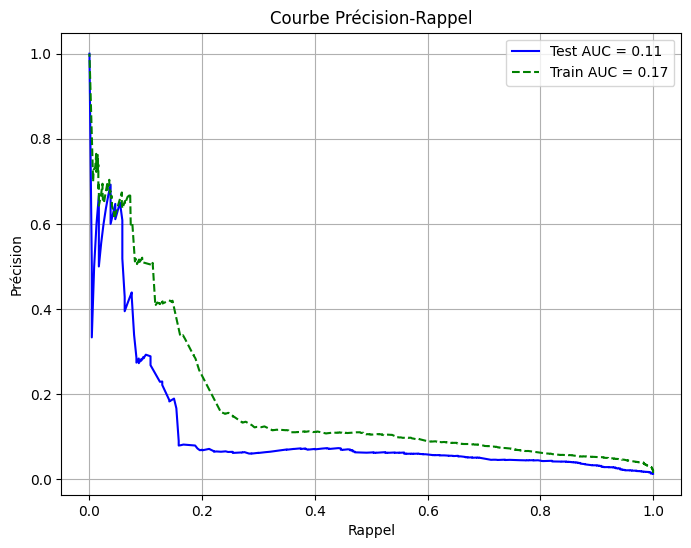

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


# Calculer précision, rappel et seuils pour les données de test
precision_test, recall_test, _ = precision_recall_curve(y_test, y_scores)
average_precision_test = average_precision_score(y_test, y_scores)

# Calculer précision, rappel et seuils pour les données d'entraînement
precision_train, recall_train, _ = precision_recall_curve(y_train, y_proba_train)
average_precision_train = average_precision_score(y_train, y_proba_train)

# Tracer les courbes
plt.figure(figsize=(8, 6))

# Courbe pour les données de test
plt.plot(recall_test, precision_test, color='blue', label=f'Test AUC = {average_precision_test:.2f}')

# Courbe pour les données d'entraînement
plt.plot(recall_train, precision_train, color='green', linestyle='--', label=f'Train AUC = {average_precision_train:.2f}')

# Ajouter les labels et la légende
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend(loc='best')
plt.grid(True)
plt.show()


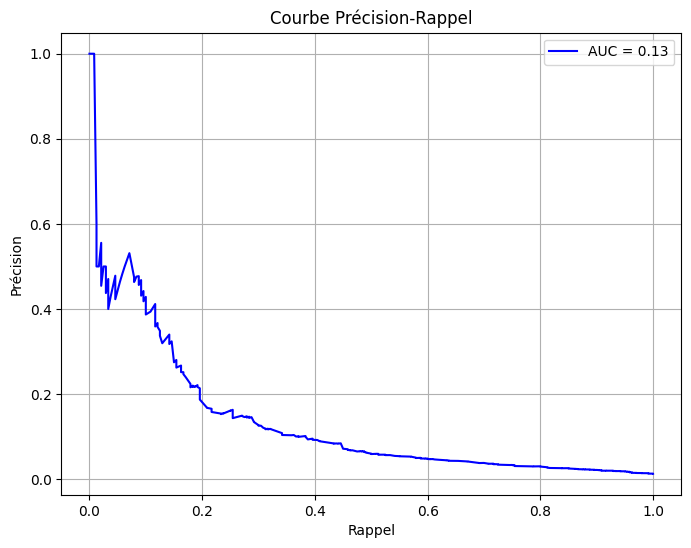

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calculer les scores de probabilité (au lieu des prédictions binaires)
# Si vous avez un classificateur binaire comme un arbre de décision, utilisez predict_proba

# Calculer la précision et le rappel pour tous les seuils
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Calculer la précision moyenne (Area Under Precision-Recall Curve)
average_precision = average_precision_score(y_test, y_proba)

# Tracer la Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'AUC = {average_precision:.2f}')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend(loc='best')
plt.grid(True)
plt.show()


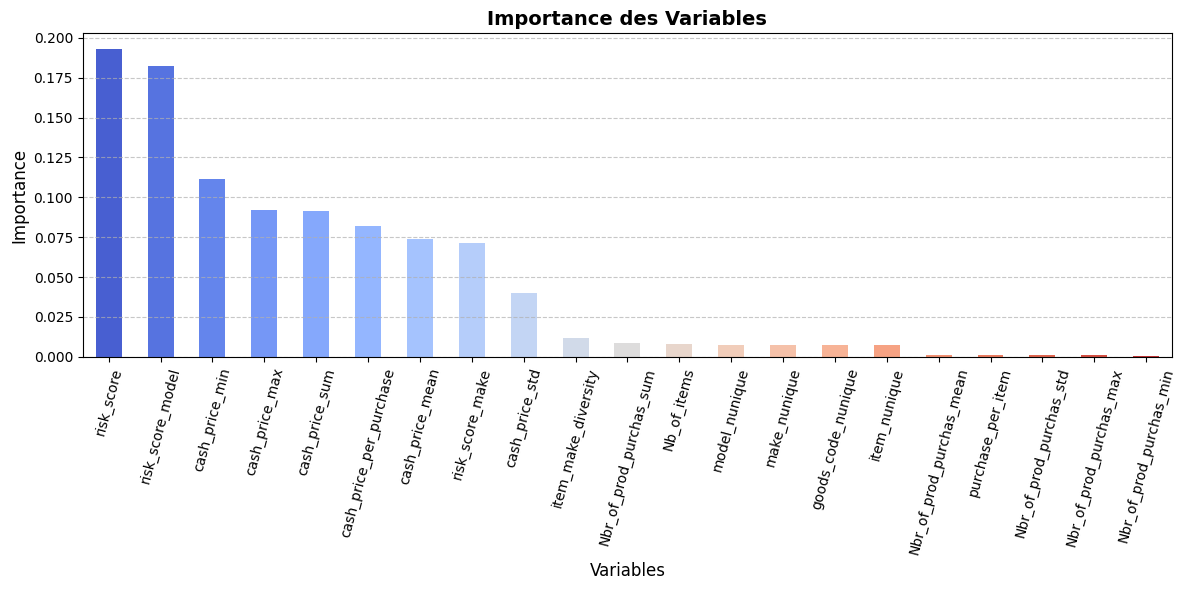

risk_score                  0.193129
risk_score_model            0.182406
cash_price_min              0.111201
cash_price_max              0.091963
cash_price_sum              0.091666
cash_price_per_purchase     0.081997
cash_price_mean             0.074059
risk_score_make             0.071104
cash_price_std              0.039873
item_make_diversity         0.011632
Nbr_of_prod_purchas_sum     0.008822
Nb_of_items                 0.007722
model_nunique               0.007678
make_nunique                0.007409
goods_code_nunique          0.007149
item_nunique                0.007088
Nbr_of_prod_purchas_mean    0.001338
purchase_per_item           0.001294
Nbr_of_prod_purchas_std     0.001061
Nbr_of_prod_purchas_max     0.000980
Nbr_of_prod_purchas_min     0.000428
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraire les importances des variables du meilleur modèle
importances = pd.Series(best_model.feature_importances_, index=X.columns)

# Trier les importances par ordre décroissant
importances_sorted = importances.sort_values(ascending=False)

# Définir une palette de couleurs (dégradé du bleu au rouge)
colors = sns.color_palette("coolwarm", len(importances_sorted))

# Afficher les importances sous forme de graphique
plt.figure(figsize=(12, 6))
importances_sorted.plot(kind='bar', color=colors)
plt.title('Importance des Variables', fontsize=14, fontweight='bold')
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Variables', fontsize=12)
plt.xticks(rotation=75)  # Incliner les labels pour plus de lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Afficher les importances sous forme de tableau
print(importances_sorted)



In [ ]:
# Convertir les probabilités en classes binaires (seuil de 0.5)
y_pred = (y_scores >= 0.5).astype(int)

# Calcul de la précision
precision = precision_score(y_test, y_pred, average='macro')  # Moyenne par classe
print(f"Précision : {precision:.2f}")

# Calcul du rappel
recall = recall_score(y_test, y_pred, average='macro')  # Moyenne par classe
print(f"Rappel : {recall:.2f}")


Précision : 0.52
Rappel : 0.79


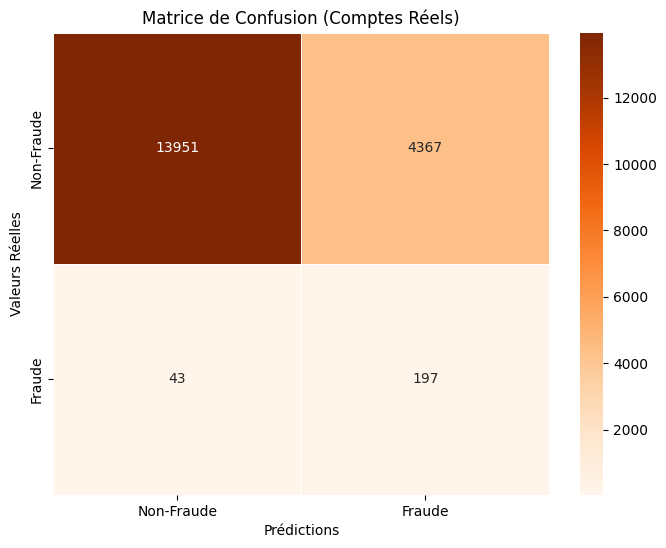

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Récupérer les noms des classes (fraude = 1, non-fraude = 0)
class_names = ['Non-Fraude', 'Fraude']

# Créer une figure et un axe
plt.figure(figsize=(8, 6))

# Heatmap avec meilleure palette de couleurs
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names, linewidths=0.5)

# Ajouter des labels et un titre
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion (Comptes Réels)')
plt.show()




class dominantes des zeros